# POL280 Bayesian Modelling Memo & Codes

(Contents are originally provided by Christopher Hare, annotated and revised by Gento Kato)

***THIS MEMO IS NOT COMPLETE***

## Lecture 1: Introduction (04/13/2017) 

###  Monte Carlo Simulation

inside
   0    1 
2106 7894 

[1] 3.1392

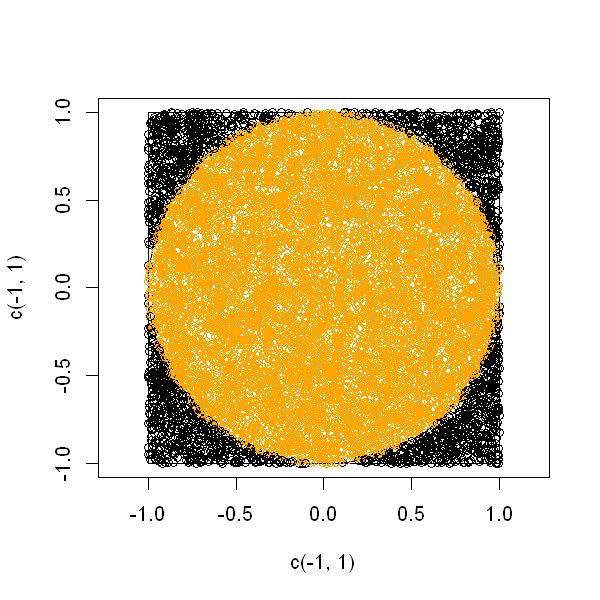

In [3]:
## Monte Carlo Simulation ##

#install.packages("plotrix")
library(plotrix)
library(grid)

options(repr.plot.width=5, repr.plot.height=5)
## Plot Rectangle and Circle
plot(c(-1, 1), c(-1, 1), type = "n", asp = 1)
rect(-1, -1, 1, 1)
draw.circle(0, 0, 1)

## Conduct Simulation 
nsamp <- 10000 # The size of sample
inside <- NA # Storage for those values inside the cirlce
for(i in 1:nsamp){
  x <- runif(2, -1, 1) ## Draw two values from uniform distribution (-1, 1)
  if (sqrt(x[1] * x[1] + x[2] * x[2]) < 1) {
    inside[i] <- 1; points(x[1], x[2], col = "orange")
  }
  if (sqrt(x[1] * x[1] + x[2] * x[2]) > 1) {
    inside[i] <- 0; points(x[1], x[2], col = "black")
  }
}

table(inside)
4 * (7848 / 10000)

## Lecture 2: Simple Bayesian Models and Priors (04/20/2017)

### Intuition: The Monty Hall Problem

Suppose you're on a game show and you're given teh choice of three doors: Behind one door is a car; behind the otheres, goats. You pick a door, say No.1, and the host, who knows what's behind the doors, opens another door, say No.3, which has a goat. He then says to you "Do you wan to pick door No.2?" Is it to your advantage to switch your choice?

Let's pick door 1, and Monty then opens door 2 to show us a goat.

Let A represent the outcome that the car is behind door 1. Let B represent the event that we're shown a goat behind door 2:

$$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$$

Let's Simulate by R!

In [92]:
## Monty Hall Problem Simulation ##
doors <- c("1", "2", "3") # Three Doors 
sim_montyhall <- function(door){
car <- sample(doors, 1) # define the door with car
pick <- doors[door] # your pick of the door
open <- sample(doors[which(doors!=car & doors!=pick)], 1) # define the door opened
return(pick==car) # return if the car is behind your picked door.
}
sims <- replicate(10000, sim_montyhall(1) ) #repeat the process many times
mean(sims) # The probability

[1] 0.3259

### Bayesian Inference

#### Do Statistical Inference

In the statistical inference context, A is replaced with $\theta$ (unknown parameters), and B is replaced with $y$ (data). Therefore, the equation becomes:

\begin{align}
P(\theta|y) &= \frac{P(\theta) P(y|\theta)}{P(y)} \\
&\propto P(\theta) L(\theta|y)
\end{align}

Intuitively stated:

Posteriot Probability (of parameter level) $\propto$ Prior Probability $\times$ Likelihood Function

It's all about **distribution**!

#### Setting Prior

Given the function given above, **prior matters** the most when the **data is sparse** (small size?) Data dominates the prior when there is enough data.

The variance of prior matters. As the **variance of prior distribution increases**, the **impact of data on poterior distribution increases**.

### Bayesian Mechanics

#### Three Steps to Model Bayesan

1. Specify... <br>
1) the probability model of **how $y$ were generated** (likelihood function) <br>
2) **prior belief** of $\theta$ (probability distribution)

2. **Update $\theta$** by conditioning the probability model on the **data**.

3. Evaluate model fit and sensitivity.

#### First Step (1): Likelihood Function

**Sampling density** $p(y | \theta)$ is an assumption about the probability distribution that generated $y$. 

Defined as **PDF** (probability density functons) **if $y$ is continuous** random variables (e.g., normal distribution), <br> 
defined as **PMF** (probability mass functions) **if $y$ is discrete** random variables (e.g., binomial/poisson distribution).

If **$y$ is fixed** (i.e., observed data) and **$\theta$ is unknown** (e.g., coefficients from regression model), then $p(y | \theta)$ is also called **likelihood function**. It is Calculataed as:

\begin{equation}
L(\theta | y) = \prod_{i=1}^n p(y_i | \theta)
\end{equation}

<center>(Product of each $y_i$'s probability for given $\theta$)</center>
<!---
Often easier to deal with natural log of the likelihood:
$$\mathit{l}(\theta | y) = \mbox{log}L(\theta | y)$$ 
Because the original likelihood often become very small, so we want to deal with the manageable numbers by taking log of it.  
--->　
 * **Frequentist** use of likelihood function: find the value of $\theta$ that maximizes the likelihood of data $y$: $\mbox{MLE}\left(\hat{\theta}\right)$. However this conceptualization cannot answer important questions such as: $pr (\theta > 0)$; $pr(\theta \in (a, b))$ or relative likelihood of competing models. <br><br>
 
 * **Bayesian** use of likelihood function: use it to extract $P(\theta|y)$. This is more interesting.




#### First Step (2): Specifying Priors

**Conjugate priors** produce posterior densities of the same distributional family as the prior.

* **Beta (prior) - Binomial (likelihood) $\Rightarrow$  Beta posterior**
  
  * This distribution is useful when the outcome variable is distributed across 0-1 range. Beta distribution takes values from 0 to 1, and binomial likelihood deals with the likelihood of value being 1 than 0. The calculation can be made as follows: <br>
\begin{align}
\mbox{Beta Prior } p(\theta) &= \frac{\Gamma(\alpha + \beta)}{\Gamma (\alpha) + \Gamma (\beta)} \theta^{\alpha-1} (1-\theta)^{\beta-1} \\
\mbox{Binomial Likelihood } &= 
\begin{pmatrix} 
n \\ y 
\end{pmatrix} 
\theta^y (1-\theta)^{n-y}  
\end{align}

   Then (can take the constant out): <br><br>
\begin{align}
\mbox{Posterior } &\propto \mbox{Prior} \times \mbox{Likelihood} \\
\pi(\theta | y) &\propto \left\{ \frac{\Gamma(\alpha + \beta)}{\Gamma (\alpha) + \Gamma (\beta)} \theta^{\alpha-1} (1-\theta)^{\beta-1} \right\} \times \left\{ 
\begin{pmatrix} 
n \\ y 
\end{pmatrix} 
\theta^y (1-\theta)^{n-y} \right\} \\
&\propto \theta^{\alpha - 1 + y} + (1 - \theta)^{\beta - 1 + n - y}
\end{align}

   The Solution is: <br><br>
\begin{align}
\mbox{Posterior } \pi (\theta | y) &\approx \mbox{Beta}( \alpha + y, \beta + n - y) \\
E(\theta | y) &\approx \frac{\alpha + y}{\alpha + \beta + n} 
\end{align}

* **Gamma (Prior) - Poisson (Likelihood) $\Rightarrow$ Gamma Posterior**

\begin{align}
\mbox{Gamma } &= \frac{\beta^{\alpha}}{\Gamma (\alpha)} \theta^{\alpha-1} e^{- \beta \theta} \\
\mbox{Poisson PMF } &= p(y | \theta) = \frac{e^{-\theta} \theta^{y_i}}{y_i !} \\
\mbox{Poisson Likelihood } &= \mathit{L}(\theta | y) = \hat{\Pi}_{i=1}^n \frac{e^{-\theta} \theta^{y_i}}{y_i !} \\
&= \frac{e^{-\theta n} \theta^{\sum_{i=1}^{n} y_i} }{y_1 ! y_2 ! \dots y_n !} \\
\pi(\theta | y) &\propto \frac{\beta^{\alpha}}{\Gamma (\alpha)} \theta^{\alpha-1} e^{- \beta \theta} \times \frac{e^{-\theta n} \theta^{\sum_{i=1}^{n} y_i} }{y_1 ! y_2 ! \dots y_n !} \\
&\propto \theta^{\alpha - 1 + \Sigma y} e^{- \theta (\beta + n)} \\
&\propto \mbox{Gamma }(\alpha + \Sigma y, \beta + n)
\end{align}

### Motivating Example: Expected Performance of Base Ball Players

Variable of Interest: Baseball players hitting probability (theoretically ranges from 0-1)<br>
   * Prior Distribution: career batting averages of ALL baseball players (except for those who have really short career).
   * Data: career batter box appearnce and career hits for EACH baseball player (binomial)
   * Posterior: Expected performance of the player in the next batter box <br><br>
   
Use **Beta-Binomial conjugate priors** to model this variable!

In [25]:
## Library dplyr package 
library(dplyr) 

## Import Baseball Players Data
load("../data/POL280/baseball.Rda") 

## Filter data as AB >=500 (Appeared in batter box 500 or more times)
career_filtered <- career %>% filter(AB >= 500) 

## See inside
head(career_filtered) 
## H = hits; AB = appearnce at batter box, average = career batting av.

name           H    AB    average  
1 Hank Aaron     3771 12364 0.3049984
2 Tommie Aaron    216   944 0.2288136
3 Ed Abbaticchio  772  3044 0.2536137
4 Fred Abbott     107   513 0.2085770
5 Jeff Abbott     157   596 0.2634228
6 Kurt Abbott     523  2044 0.2558708

Now, we can fit the binomial distribution to the "average" data and make it a prior distribution.

Warning message in densfun(x, parm[1], parm[2], ...):
"NaNs produced"Warning message in densfun(x, parm[1], parm[2], ...):
"NaNs produced"Warning message in densfun(x, parm[1], parm[2], ...):
"NaNs produced"

[1] "The fitted beta distribution is B (alpha =  78.81 ; beta =  225.59 )"

[1] "The fitted distribution has a mean of  0.259  and the variance of  0.001"

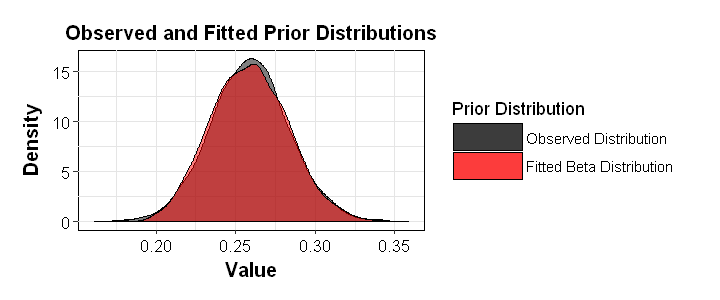

In [80]:
## Fitting beta distribution to the given batting average data
m <- MASS::fitdistr(career_filtered$average, dbeta,
                    ## starting value: alpha = 1, beta = 10                    
                    start = list(shape1 = 1, shape2 = 10))

## Store Parameters of fitted prior distribution (of expected batting average)
alpha0 <- m$estimate[1]; beta0 <- m$estimate[2]
paste("The fitted beta distribution is B (alpha = ", round(alpha0,2), "; beta = ", round(beta0,2), ")")

#Compare the observed distribution and fitted distribution. 
library(ggplot2); source("../sources/gktheme.R")
fittedprior <- rbeta(length(career_filtered$average),alpha0,beta0) 
 # generate fitted distributionn (same n as observed, for the comparison)
priordist <- data.frame(obs=career_filtered$average, fit=fittedprior) 
 # Store them into dataframe
bgraph <- ggplot(priordist) + gktheme +
    geom_density(aes(obs, fill="1"), alpha = 0.5, size=0.5) +   
    geom_density(aes(fit, fill="2"), alpha = 0.5, size=0.5) +   
    scale_fill_manual(name="Prior Distribution",values=c(1,2), 
      labels = c("Observed Distribution","Fitted Beta Distribution"))+
    xlab("Value")+ ylab("Density")+
    ggtitle("Observed and Fitted Prior Distributions")+
    theme(legend.position = "right")

paste("The fitted distribution has a mean of ", round(mean(fittedprior),3), 
      " and the variance of ", round(var(fittedprior),3))
options(repr.plot.width=6, repr.plot.height=2.5)
bgraph

As shown above, we have almost perfect fit of beta distribution to the observed distribution. That's good.

Now, we can move on to estimate the posterior distribution of expected performance at the next batting opportunity.

In [28]:
## Store expected batting average from posterior distribution
career_eb <- career %>% mutate(eb_estimate = (H + alpha0) / (AB + alpha0 + beta0))

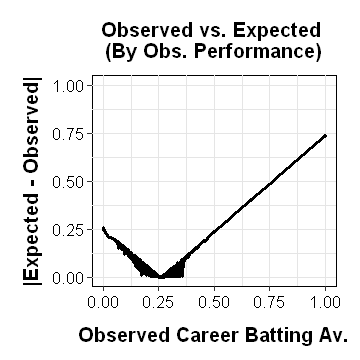

In [61]:
## Plot expected performance by observed career average
library(ggplot2); source("../sources/gktheme.R")
bgraph <- ggplot(career_eb) + gktheme +
    geom_line(aes(x = average, y = abs(average-eb_estimate)), size = 1) +   
    scale_y_continuous(limits=c(0,1))+ scale_x_continuous(limits=c(0,1))+
    xlab("Observed Career Batting Av.")+ 
    ylab("|Expected - Observed|")+
    ggtitle("Observed vs. Expected \n(By Obs. Performance)")
options(repr.plot.width=3, repr.plot.height=3)
bgraph

The above plot has a straight forward implication. The posterior expected performance gets further away from observed performance as the observed performance become more extreme relative to the mean of prior beleif distribution (= 0.258).

Let's look at the result from another perspective...

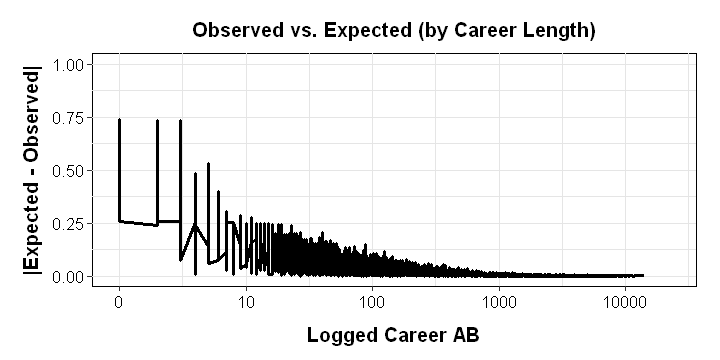

In [62]:
bgraph <- ggplot(career_eb) + gktheme +
    geom_line(aes(x = log(AB), y = abs(average-eb_estimate)), size = 1) +   
    scale_y_continuous(limits=c(0,1))+ 
    scale_x_continuous(limits=c(0,10),breaks=c(0,log(10),log(100),log(1000),log(10000)),
                       labels=c("0","10","100","1000","10000"))+
    xlab("Logged Career AB")+ ylab("|Expected - Observed|")+
    ggtitle("Observed vs. Expected (by Career Length)")
                       
options(repr.plot.width=6, repr.plot.height=3)
bgraph

The implication from the second plot is interesting. It indicates that, as the player has more data of its own, data is more likely to overwhelm prior beliefs.

Let's look at this in more precise way. Following three players have (approximately) same career batting average, but has different length in career (AB):

In [77]:
career[c(which(career_eb$name == "Pete Rose"),
         which(career_eb$name == "Eddie Brown"),
         which(career_eb$name == "Walt French")),][-2,]

name        H    AB    average  
1 Pete Rose   4256 14053 0.3028535
2 Eddie Brown  878  2902 0.3025500
3 Walt French  297   981 0.3027523

We have the same prior distribution $\mbox{Beta}( \alpha \approx 78.81; \beta \approx 225.59)$, remember that the posterior distribution can be calculated as:

\begin{align}
\mbox{Posterior } \pi (\theta | y) &\approx \mbox{Beta}( \alpha + y, \beta + n - y) 
\end{align}

Now, we can generate and plot the posterior distribution of the expected performance as follows:

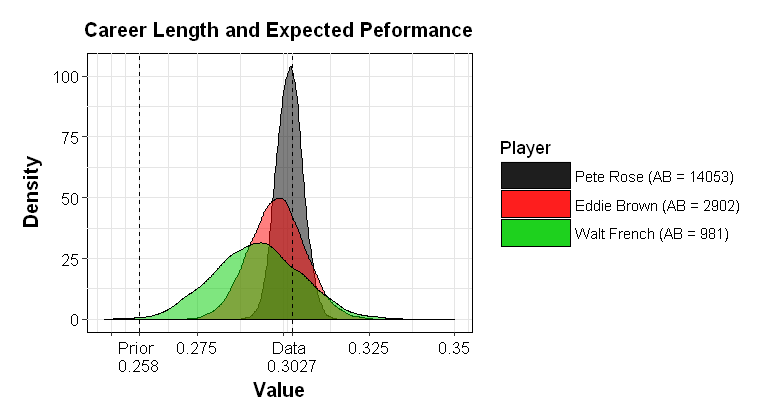

In [98]:
pete = rbeta(10000, alpha0 + 4256, beta0 + 14053 - 4256)
eddie = rbeta(10000, alpha0 + 878, beta0 + 2902 - 878)
walt = rbeta(10000, alpha0 + 297, beta0 + 981 - 297)

posteriordist <- data.frame(pete, eddie, walt)

bgraph <- ggplot(posteriordist) + gktheme +
    geom_density(aes(pete, fill="1"), alpha = 0.5, size=0.5) +   
    geom_density(aes(eddie, fill="2"), alpha = 0.5, size=0.5) +   
    geom_density(aes(walt, fill="3"), alpha = 0.5, size=0.5) +   
    geom_vline(xintercept = 0.3027,linetype = 2) + 
    geom_vline(xintercept = 0.258,linetype = 2) + 
    scale_x_continuous(limits=c(0.248,0.35),breaks=c(0.25,0.258,0.275,0.3,0.3027,0.325,0.35),
                       labels=c("","Prior \n0.258",0.275,"","Data \n0.3027",0.325,0.35))+
    scale_fill_manual(name="Player",values=c(1,2,3), 
      labels = c("Pete Rose (AB = 14053)","Eddie Brown (AB = 2902)","Walt French (AB = 981)"))+
    xlab("Value")+
    ylab("Density")+
    ggtitle("Career Length and Expected Peformance")+
    theme(legend.position = "right")

options(repr.plot.width=6.5, repr.plot.height=3.5)
bgraph

The above illustration clearly indicates that expected performance of players with longer career is less dependent upon prior belief. Everyone knows that how Pete Rose is expected to perform next time according to his past, while prior belief takes much stronger role in predicting performance of Walt French. Also, note that uncertainty over the expectation is much larger (high variance) for player with shorter career (like Walt French) than for player with longer career (like Pete Rose).   

## Lecture 3 Sampling (04/27/2017)

### Priors and Posteriors

 * **Conjugate priors** and **solicited priors**. Solicited priors are often more difficult to defend (convenient distribution to get better result...) <br><br>
 
 * If we want the prior to be **essentially flat**, it is popular to use uniform distibution (computationally challenging), or diffused normal (i.e., very high variance. Computationally little more easy).

### Use Conjugate Priors

#### Beta Distribution

\begin{align}
B(\alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma (\alpha) + \Gamma (\beta)} \theta^{\alpha-1} (1-\theta)^{\beta-1}
\end{align}

This is a PDF on $[0, 1]$ interval, with expected value $\cfrac{\alpha}{\alpha + \beta}$ & variance $\cfrac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$ 

If $\alpha = \beta$, then the relevant statistics are reduced to expected value $\cfrac{1}{2}$ & variance $\cfrac{1}{4(2\beta + 1)}$.

Examples of the distribution.

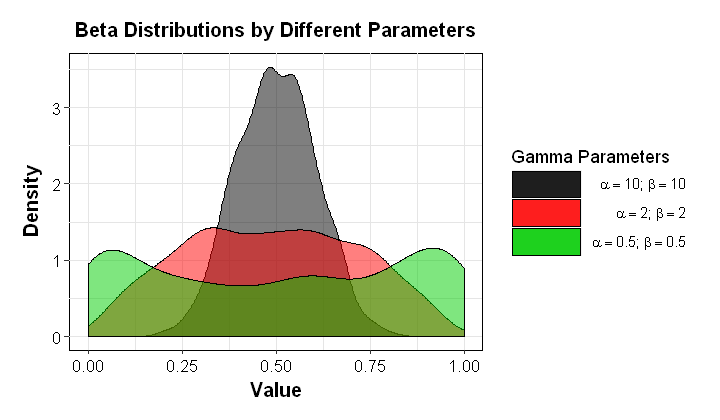

In [96]:
b1 <- rbeta(1000,10,10) # alpha = beta (small variance)
b2 <- rbeta(1000,2,2) # alpha = beta (medium variance)
b3 <- rbeta(1000,0.5,0.5) # alpha = beta (large variance)

library(ggplot2);
source("https://raw.githubusercontent.com/gentok/Method_Notes/master/sources/gktheme.R")

betadist <- data.frame(b1, b2, b3) 

## Plot Result ##
bgraph <- ggplot(betadist) + gktheme +
    geom_density(aes(b1, fill="1"), alpha = 0.5, size=0.5) +   
    geom_density(aes(b2, fill="2"), alpha = 0.5, size=0.5) +   
    geom_density(aes(b3, fill="3"), alpha = 0.5, size=0.5) +   
    scale_fill_manual(name="Gamma Parameters",values=c(1,2,3), 
      labels = c(expression(paste(alpha == 10, "; " , beta == 10)),
                 expression(paste(alpha == 2, "; " , beta == 2)),
                 expression(paste(alpha == 0.5, "; " , beta == 0.5))))+
    xlab("Value")+
    ylab("Density")+
    ggtitle("Beta Distributions by Different Parameters")+
    theme(legend.position = "right")

options(repr.plot.width=6, repr.plot.height=3.5)
bgraph

$$\mbox{Binomial Likelihood } = 
\begin{pmatrix} 
n \\ y 
\end{pmatrix} 
\theta^y (1-\theta)^{n-y} 
$$
 * The value of $\theta$ most likely to have produced the observed data is $\frac{y}{n}$

Then, from the last lecture, **posterior** is (can take the constant out for the minimization problem): 

\begin{align}
\mbox{Posterior } &\propto \mbox{Prior} \times \mbox{Likelihood} \\
\pi(\theta | y) &\propto \left\{ \frac{\Gamma(\alpha + \beta)}{\Gamma (\alpha) + \Gamma (\beta)} \theta^{\alpha-1} (1-\theta)^{\beta-1} \right\} \times \left\{ 
\begin{pmatrix} 
n \\ y 
\end{pmatrix} 
\theta^y (1-\theta)^{n-y} \right\} \\
&\propto \theta^{\alpha - 1 + y} + (1 - \theta)^{\beta - 1 + n - y}
\end{align}

The Solution is:

\begin{align}
\mbox{Posterior } \pi (\theta | y) &\approx \mbox{Beta}\left( \alpha + y, \beta + n - y\right) \\
E(\theta | y) &\approx \frac{\alpha + y}{\alpha + \beta + n} 
\end{align}

#### Example: Undervoting (白票を投じる?)

 * Tomz and van Howelling (2003) finds that, using 1964-2004 ANES data, 10/1091 (0.91%) black respondents and 57/9770 (0.58%) of white respondents stated they undervoted. <br><br>
 
 * We know posterior distributions of undervoting: $\pi_{black}$, $\pi_{white}$ <br><br>
 
 * Set **prior** as $B(\alpha=1, \beta=100)$. Then we can extract the sample of posterior distribution as follows... <br>

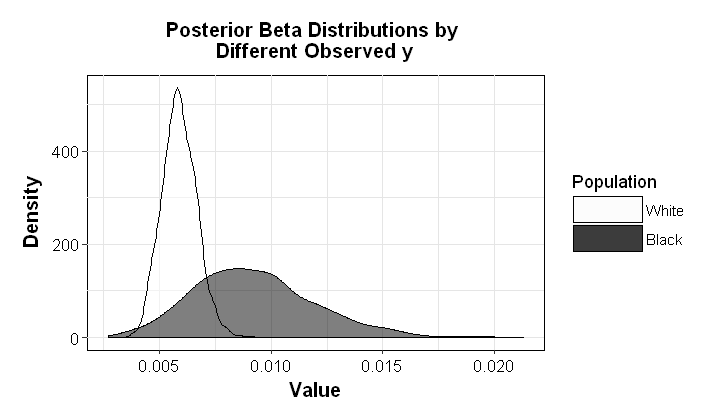

In [9]:
## Sample beta posterior distribution, given specified prior.
## Note that, in this specification, Beta( alpha + y, beta + n - y)
white <- rbeta(1000, (1 + 57), (100 + 9770 - 57)) ## Draw 1000
black <- rbeta(1000, (1 + 10), (100 + 1091 - 10)) ## Draw 1000

betadist <- data.frame(white,black) 

## Plot Result ##
bgraph <- ggplot(betadist) + gktheme +
    geom_density(aes(white, fill="1"), alpha = 0.5, size=0.5) +   
    geom_density(aes(black, fill="2"), alpha = 0.5, size=0.5) +   
    scale_fill_manual(name="Population",
                      values=c("white","black"),labels = c("White","Black"))+
    xlab("Value") + ylab("Density")+
    ggtitle("Posterior Beta Distributions by \nDifferent Observed y")+
    theme(legend.position = "right")

options(repr.plot.width=6, repr.plot.height=3.5)
bgraph

We can calculate the "p-value" of Bayesian model as follows...

In [29]:
## Likelihood of black undervoting intention higher than white
table(black > white) 
## Calculate p-value of black undervotes more than whites
paste("Bayesian p-value is: ", table(black > white)[2] / 1000, 
      "(higher is better)")
## 95$ Credible Interval Can be Extracted Just as:
blackCI = quantile(black, probs=c(0.025, 0.095))
paste("Blac")
whiteCI = quantile(black, probs=c(0.025, 0.095))



FALSE  TRUE 
  114   886 

[1] "Bayesian p-value is:  0.886 (higher is better)"

(Note on Gamma Distribution: Shape = alpha; scale = beta)

### Mote-Carlo Simulation

 * **Problem**:  How do you solve multidimensional integral equations needed to model behavior of complex systems with many random quantities? <br><br>
 
 * **Solution**: We can learn learn by sampling many times from $f(\theta)$, the density of $\theta$. We assume that, as $n \rightarrow \infty$, $\hat{\theta} \rightarrow \theta$ (We borrow frequentist assumption).  

#### Rejection Sampling: 


In [34]:
## Some Complicated Function
target <- function(z){return((1/40)*(2*z+3))}
#
a <- 0 ## Lower Boundary
b <- 5 ## Higher Boundary
k <- 2
enveloping <- .2
ndraws <- 1000
proposed <- accept <- rep(NA,ndraws)
for (i in 1:ndraws){
proposed[i] <- z <- runif(1, a, b)
R <- target(z) / (k * enveloping)
if(R > runif(1, 0, 1)){accept[i] <- z}
}
target(2)
accept[1:10]
proposed[1:10]

[1] 0.175

[1]        NA 1.3448876 0.7848363 3.5551707 1.2674157 1.6766242        NA
 [8] 1.4892489 1.8753207        NA

[1] 3.5805265 1.3448876 0.7848363 3.5551707 1.2674157 1.6766242 2.7421494
 [8] 1.4892489 1.8753207 3.1127438

[1] 44

[1] 176

[1] 142

[1] 200

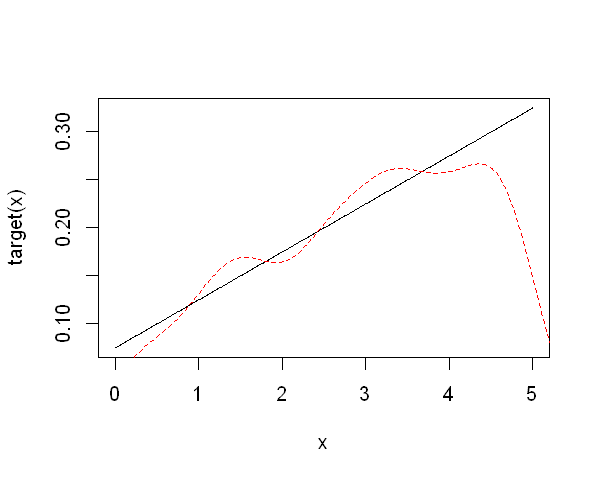

In [35]:
x <- seq(0,5,0.01)
plot(x, target(x), type="l")
lines(density(accept, na.rm=TRUE), lty=2, col="red")
#
length(proposed[accept < 1 & !is.na(accept)])
length(proposed[proposed < 1])
#
length(proposed[accept > 4 & !is.na(accept)])
length(proposed[proposed > 4])